<a href="https://colab.research.google.com/github/tackulus/204426/blob/main/Lab_09_610510531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Workshop 9: Data Exploration and Visualization (Multivariate Visualization)**
**คำสั่ง**

1.   ศึกษาวิธีการแสดงภาพข้อมูลเบื้องต้น สำหรับข้อมูลหลายมิติ
2.   ทำโจทย์ปฏิบัติการแต่ละข้อตามคำสั่ง
3.   ตั้งชื่อไฟล์ python notebook นี้ในรูปแบบ Lab_09_XXXXXXXXX.ipynb โดย XXXXXXXXX คือ รหัสนักศึกษา
4.   ทำการดาวน์โหลดและส่งไฟล์ Lab_09_XXXXXXXXX.ipynb ที่เว็บไซต์ http://hw.cs.science.cmu.ac.th 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from scipy import stats

In [2]:
# load lris
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Scatterplot**

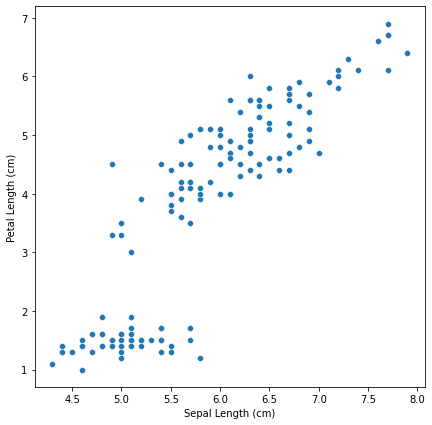

In [3]:
# Plot the data in 2D feature space
plt.figure(figsize=(7, 7))
fig = sns.scatterplot(data=iris, x='sepal_length', y='petal_length')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.show(fig)

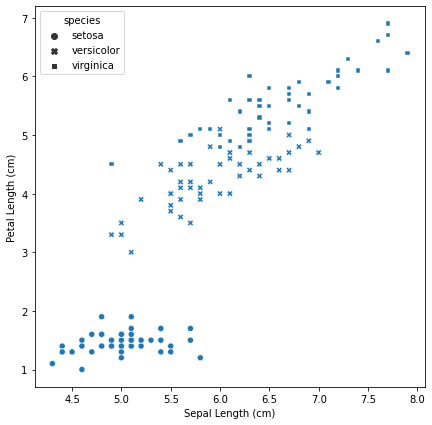

In [4]:
# Plot the data in 2D feature space with a categotical data
plt.figure(figsize=(7, 7))
fig = sns.scatterplot(data=iris, x='sepal_length', y='petal_length', style="species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.show(fig)

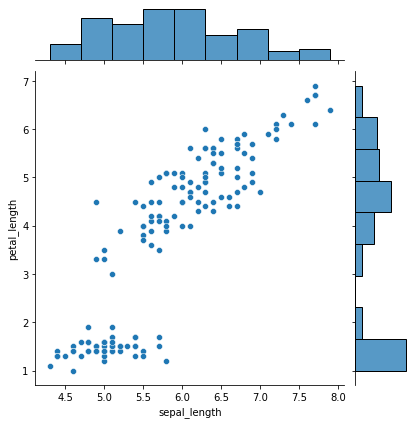

In [5]:
# joint plot (scatterplot+histogram)
fig = sns.jointplot(data=iris, x='sepal_length', y='petal_length')
plt.show(fig)

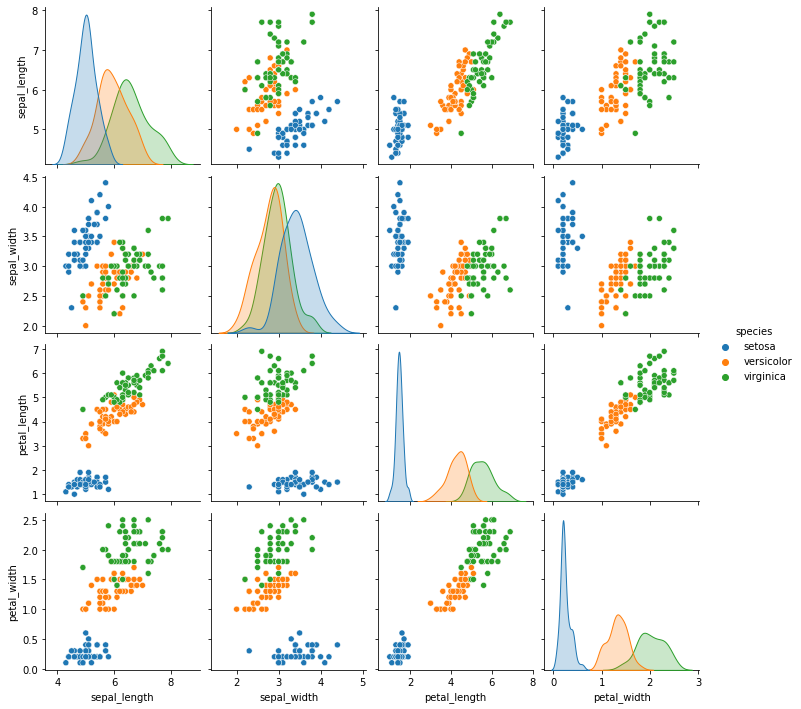

In [6]:
# Scatterplot matrix
fig = sns.pairplot(data=iris, hue='species')
plt.show(fig)

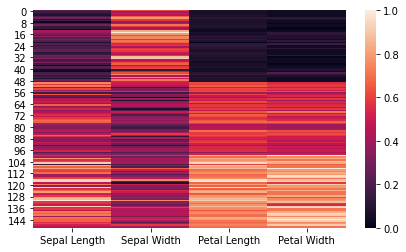

In [7]:
# Heatmap
plt.figure(figsize=(7, 4))
# First, normalize the data
irist_tmp = iris.loc[:,['sepal_length','sepal_width','petal_length','petal_width']]
irist_tmp['sepal_length'] = (irist_tmp['sepal_length']-irist_tmp['sepal_length'].min())/(irist_tmp['sepal_length'].max()-irist_tmp['sepal_length'].min())
irist_tmp['sepal_width'] = (irist_tmp['sepal_width']-irist_tmp['sepal_width'].min())/(irist_tmp['sepal_width'].max()-irist_tmp['sepal_width'].min())
irist_tmp['petal_length'] = (irist_tmp['petal_length']-irist_tmp['petal_length'].min())/(irist_tmp['petal_length'].max()-irist_tmp['petal_length'].min())
irist_tmp['petal_width'] = (irist_tmp['petal_width']-irist_tmp['petal_width'].min())/(irist_tmp['petal_width'].max()-irist_tmp['petal_width'].min())

# Then, plot a heatmap
fig = sns.heatmap(data=irist_tmp,xticklabels=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
plt.show(fig)

In [8]:
# load penguins dataset
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


ปฏิบัติการข้อ 1) จงแสดงความสัมพันธ์ระหว่างตัวแปรเชิงตัวเลขแต่ละคู่ในชุดข้อมูล penguins

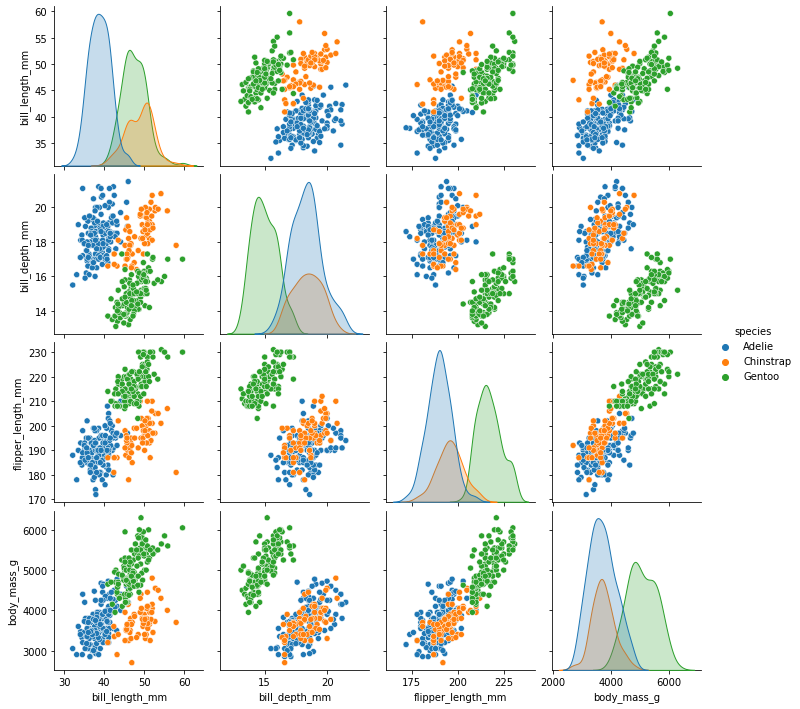

In [10]:
# Answer here!
fig = sns.pairplot(data=penguins, hue='species')
plt.show(fig)

ปฏิบัติการข้อ 2) จงแสดงภาพข้อมูลเพื่อหาคำตอบว่า ตัวแปร bill_length_mm	และ bill_depth_mm สามารถใช้ในการจำแนก species เพนกวิ้นได้หรือไม่

> สามารถจำแนกได้ โดยมีความเป็นไปได้ที่จะจำแนกผิด

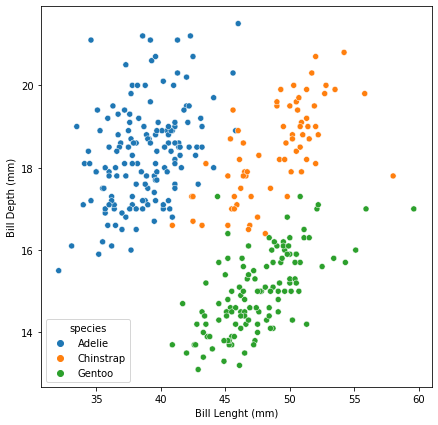

In [15]:
# Answer here! 
plt.figure(figsize=(7, 7))
fig = sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.xlabel("Bill Lenght (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show(fig)

ปฏิบัติการข้อ 3) จงแสดงภาพข้อมูลเพื่อแสดงให้เห็นว่าเพนกวิ้นที่อาศัยอยู่ในแต่ละเกาะ มีคุณลักษณ์ใดที่เหมือนหรือแตกต่างกันบ้าง

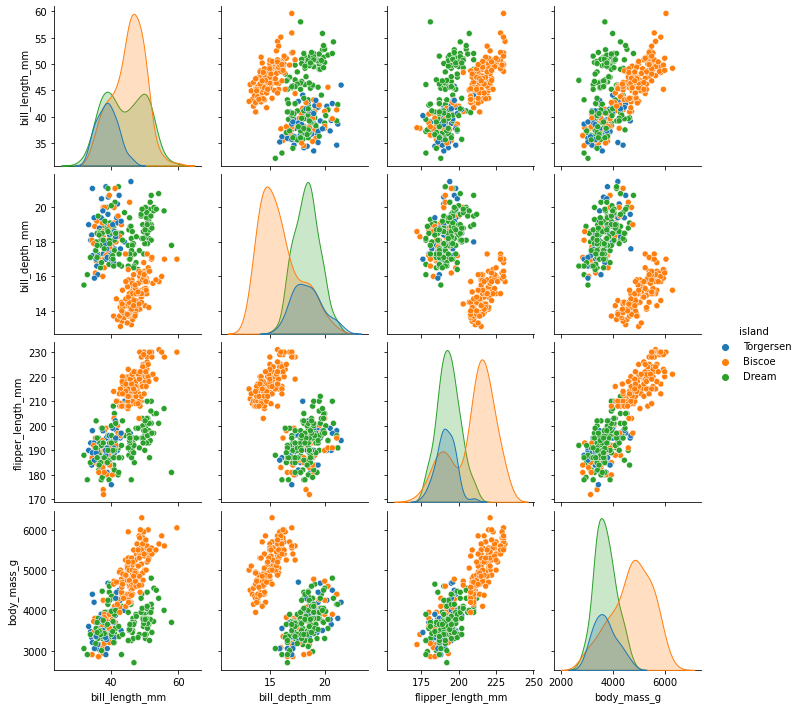

In [30]:
fig = sns.pairplot(data=penguins, hue='island')
plt.show(fig)

**Determine the data distribution using Q-Q plot**

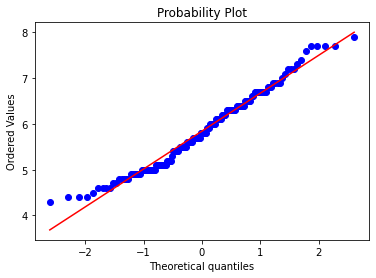

In [17]:
# QQ plot using scipy
# See detail: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

res = stats.probplot(iris['sepal_length'], dist=stats.norm, plot=plt)

ปฏิบัติการข้อ 4) จงตรวจสอบว่าค่าตัวแปร bill_length_mm ในชุดข้อมูล penguins มีลักษณะการกระจายแบบปรกติหรือไม่





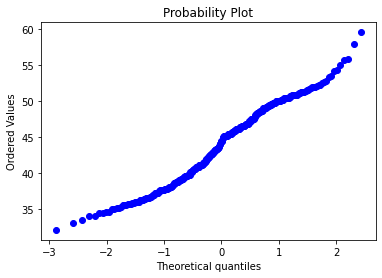

In [19]:
# Answer here!  
res = stats.probplot(penguins.bill_length_mm, dist=stats.norm, plot=plt)

**Visualization for categorical data**

In [20]:
# load tips dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


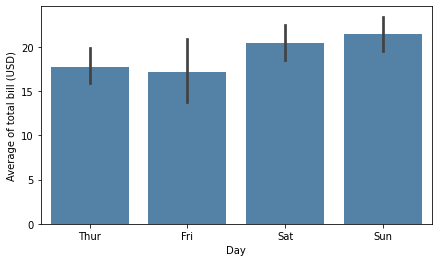

In [21]:
# bar plot
plt.figure(figsize=(7, 4))
fig = sns.barplot(data=tips, x="day", y="total_bill", color='steelblue')
plt.xlabel("Day")
plt.ylabel("Average of total bill (USD)")
plt.show(fig)

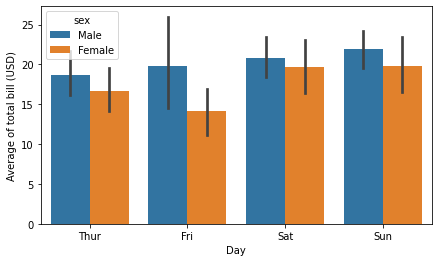

In [33]:
# clusted bar plot
plt.figure(figsize=(7, 4))
fig = sns.barplot(data=tips, x="day", y="total_bill", hue="sex")
plt.xlabel("Day")
plt.ylabel("Average of total bill (USD)")
plt.show(fig)

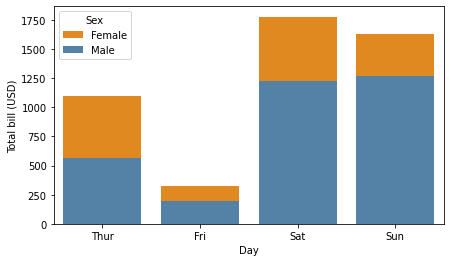

In [23]:
# Stacked Barplot
plt.figure(figsize=(7, 4))
total = tips.groupby('day')['total_bill'].sum().reset_index()

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkorange', label='Female')

# bottom bar ->  take only smoker=Yes values from the data
male = tips[tips.sex=='Male']

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=male, estimator=sum, ci=None,  color='steelblue', label='Male')

# add legend
#top_bar = mpatches.Patch(color='darkorange', label='Female')
#bottom_bar = mpatches.Patch(color='steelblue', label='Male')
plt.legend(title="Sex")

plt.xlabel("Day")
plt.ylabel("Total bill (USD)")

# show the graph
plt.show()


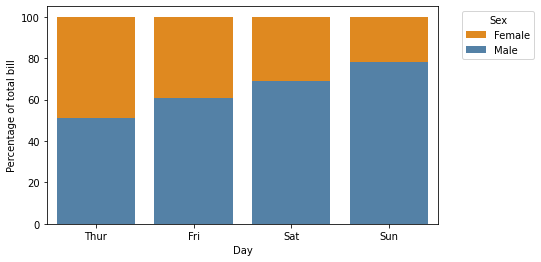

In [24]:
# Percent Stacked Bar Chart
plt.figure(figsize=(7, 4))

total = tips.groupby('day')['total_bill'].sum().reset_index()
male = tips[tips.sex=='Male'].groupby('day')['total_bill'].sum().reset_index()

male['total_bill'] = [i / j * 100 for i,j in zip(male['total_bill'], total['total_bill'])]
total['total_bill'] = [i / j * 100 for i,j in zip(total['total_bill'], total['total_bill'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkorange', label='Female')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=male, color='steelblue', label='Male')

# add legend
plt.legend(title='Sex',bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Day")
plt.ylabel("Percentage of total bill")

# show the graph
plt.show()

ปฏิบัติการข้อ 5) จงเปรียบเทียบค่าเฉลี่ยตัวแปร body_mass_g ในชุดข้อมูล penguinsสำหรับเพนกวิ้นแต่ละสายพันธุ์





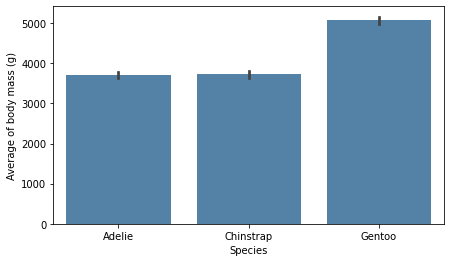

In [31]:
# Answer here!
plt.figure(figsize=(7, 4))
fig = sns.barplot(data=penguins, x="species", y="body_mass_g", color='steelblue')
plt.xlabel("Species")
plt.ylabel("Average of body mass (g)")
plt.show(fig)

ปฏิบัติการข้อ 6) จงเปรียบเทียบค่าเฉลี่ยตัวแปร body_mass_g ในชุดข้อมูล penguinsสำหรับเพนกวิ้นแต่ละเพศและสายพันธุ์

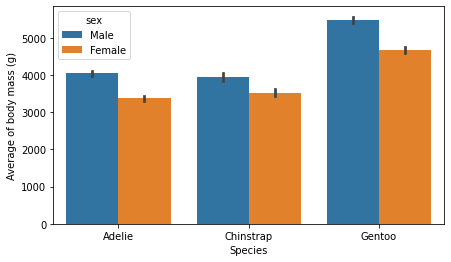

In [32]:
# Answer here!
plt.figure(figsize=(7, 4))
fig = sns.barplot(data=penguins, x="species", y="body_mass_g", hue="sex")
plt.xlabel("Species")
plt.ylabel("Average of body mass (g)")
plt.show(fig)

ปฏิบัติการข้อ 7) จงเปรียบเทียบสัดส่วนจำนวนเพนกวิ้นเพศผู้และเพศเมีย ที่อาศัยอยู่ในแต่ละเกาะ

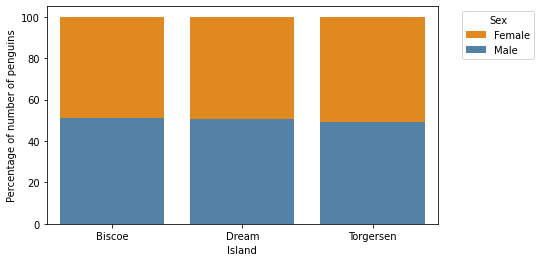

In [55]:
# Answer here!
plt.figure(figsize=(7, 4))

total = penguins.groupby("island")["sex"].count()
male = penguins[penguins.sex=="Male"].groupby("island")["sex"].count()

male = [i / j * 100 for i,j in zip(male, total)]
total_scaled = [i / j * 100 for i,j in zip(total, total)]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x=total.index,  y=total_scaled, color='darkorange', label='Female')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x=total.index, y=male, color='steelblue', label='Male')

# add legend
plt.legend(title='Sex',bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Island")
plt.ylabel("Percentage of number of penguins")

# show the graph
plt.show()